In [4]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
np.random.seed(0) # for reproducibility

In [6]:
# dogs have higher ear flappiness index and lower whisker length
# "normal" means gaussian distribution
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10) # mean=5, std=1, n=10
dogs_ear_flappiness_index =  np.random.normal(loc=8, scale=1, size=10) # mean=8, std=1, n=10

In [7]:
cat_whisker_length = np.random.normal(loc=8, scale=1, size=10) # mean=8, std=1, n=10
cat_ear_flappiness_index =  np.random.normal(loc=5, scale=1, size=10) # mean=5, std=1, n=10

In [8]:
# Combine the data
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cat_whisker_length, cat_ear_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), np.ones(len(cats_data)))) # 0 for dogs, 1 for cats

In [9]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

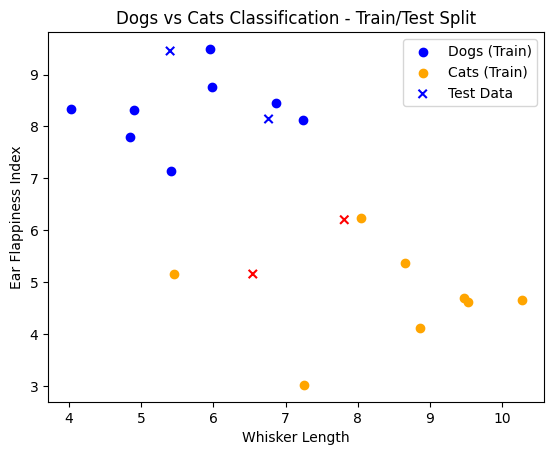

In [13]:
# Plotting the training and testing data
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], label='Dogs (Train)', color='blue', marker='o')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], label='Cats (Train)', color='orange', marker='o')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='bwr', label='Test Data', marker='x')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification - Train/Test Split')
plt.legend()
plt.show()

In [20]:
# Implementing the random line classifier algorithm
def random_linear_classifier(data_dogs, data_cats, k, d):
    # d is the number features, i.e the dimension of the data (2 in this case)
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs, data_cats, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    
    return best_theta, best_theta0, best_error


def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0

    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0: # misclassified as cat
            error += 1

    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0: # misclassified as dog
            error += 1
    
    return error

In [22]:
# Running the random line classifier
k = 100 # number of iterations
d = 2 # number of features

best_theta_train, best_theta0_train, train_error = random_linear_classifier(x_train[y_train == 0], x_train[y_train == 1], k, d)

In [23]:
# Plot the decision boundary
x_values_train = np.linspace(2, 10, 100)
y_values_train = (-best_theta_train[0] / best_theta_train[1]) * x_values - (best_theta0_train / best_theta_train[1])

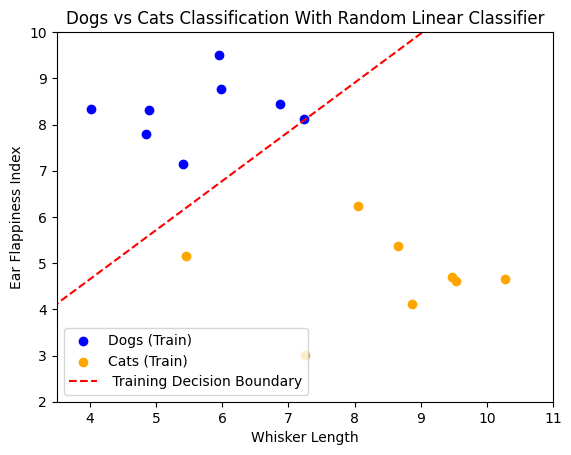

In [ ]:
# Plotting the data
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], label='Dogs (Train)', color='blue', marker='o')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], label='Cats (Train)', color='orange', marker='o')
plt.plot(x_values_train, y_values_train, color='red', linestyle='--', label=' Training Decision Boundary')
# Set limits for x and y axes
plt.xlim(3.5, 11)
plt.ylim(2, 10)
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification With Training Decision Boundary')
plt.legend()
plt.show()

In [27]:
print(f"Training Error: {train_error} out of {len(x_train)}")

Training Error: 0 out of 16


In [28]:
# compute test error
test_error = compute_error(x_test[y_test == 0], x_test[y_test == 1], best_theta_train, best_theta0_train)
print(f"Test Error: {test_error} out of {len(x_test)}")

Test Error: 0 out of 4


In [ ]:
# Plotting the actual test data and predicted test data
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], label='Dogs (Train)', color='blue', marker='o')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], label='Cats (Train)', color='orange', marker='o')
plt.plot(x_values_train, y_values_train, color='red', linestyle='--', label=' Training Decision Boundary')
# Set limits for x and y axes
plt.xlim(3.5, 11)
plt.ylim(2, 10)
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification With Training Decision Boundary')
plt.legend()
plt.show()